## House Sales in King County, USA

#### This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. Thr goal is to predict house price using regression.

#### Overview

The dataset contains information about 21,613 houses, with the following columns:

1. **id**: Unique identifier for each house.
2. **date**: Date the house was sold.
3. **price**: Sale price of the house.
4. **bedrooms**: Number of bedrooms.
5. **bathrooms**: Number of bathrooms.
6. **sqft_living**: Square footage of the living space.
7. **sqft_lot**: Square footage of the lot.
8. **floors**: Number of floors.
9. **waterfront**: Indicates if the house is on the waterfront.
10. **view**: Quality of the view from the house.
11. **condition**: Condition of the house.
12. **grade**: Overall grade given to the housing unit, based on King County grading system.
13. **sqft_above**: Square footage of the house apart from the basement.
14. **sqft_basement**: Square footage of the basement.
15. **yr_built**: Year the house was built.
16. **yr_renovated**: Year the house was renovated.
17. **zipcode**: ZIP code where the house is located.
18. **lat**: Latitude coordinate.
19. **long**: Longitude coordinate.
20. **sqft_living15**: Living room area in 2015.
21. **sqft_lot15**: Lot area in 2015.

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error


In [62]:
# Load the dataset
df = pd.read_csv('kc_house_data.csv')

# Print the first 5 rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


The `date` column is currently in an object (string) format and includes a timestamp, which might not be necessary for all analyses.
The `bathrooms` column is represented as a float, which can include fractional values indicating the presence of half bathrooms.


### EDA, preprocessing and cleaning

In [63]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

The dataset contains 21,613 entries and 21 columns.
There are no missing values in any of the columns.
The data types for the columns are as follows:
   - `id`, `bedrooms`, `sqft_living`, `sqft_lot`, `floors`, `waterfront`, `view`, `condition`, `grade`, `sqft_above`, `sqft_basement`, `yr_built`, `yr_renovated`, `zipcode`, `sqft_living15`, `sqft_lot15` are integers.
   
   - `price`, `bathrooms`, `lat`, `long` are floats.
   - `date` is an object (string).

In [64]:
# Get a statistical summary of the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Price**:
    - The average price of a house is approximately $540,088, with a standard deviation of $367,119.
    - The minimum price is $75,000, while the maximum price is $7,700,000.

**Bedrooms**:
    - The average number of bedrooms is 3.37, with a standard deviation of 0.93.
    - The minimum number of bedrooms is 0, and the maximum is 33.

**Bathrooms**:
    - The average number of bathrooms is 2.11, with a standard deviation of 0.77.
    - The minimum number of bathrooms is 0, and the maximum is 8.

**Square Footage**:
    - The average living space is 2,079.9 sqft, with a standard deviation of 918.44 sqft.
    - The minimum living space is 290 sqft, and the maximum is 13,540 sqft.
    - The average lot size is 15,108.4 sqft, with a standard deviation of 41,420.5 sqft.
    - The minimum lot size is 520 sqft, and the maximum is 1,651,360 sqft.

**Floors**:
    - The average number of floors is 1.49, with a standard deviation of 0.54.
    - The minimum number of floors is 1, and the maximum is 3.5.

**Waterfront**:
    - Only a small percentage (0.75%) of houses are waterfront properties.

**View**:
    - The majority of houses have a view rating of 0.

**Condition and Grade**:
    - The average condition rating is 3.41, with most houses having a condition rating between 3 and 4.
    - The average grade is 7.66, with most houses having a grade between 7 and 8.

**Year Built and Renovated**:
    - The houses have an average construction year of 1971.
    - Many houses have not been renovated (year renovated is 0 for the majority).

**Location**:
    - The latitude and longitude values show the geographic spread of the properties within King County.


In [65]:
# Id duplicated
df['id'].duplicated().sum()

177

In [66]:
# Which ids are duplicated
df[df['id'].duplicated()] #Houses that were sold more than once

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
94,6021501535,20141223T000000,700000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
314,4139480200,20141209T000000,1400000.0,4,3.25,4290,12103,1.0,0,3,...,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244
325,7520000520,20150311T000000,240500.0,2,1.00,1240,12092,1.0,0,0,...,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460
346,3969300030,20141229T000000,239900.0,4,1.00,1000,7134,1.0,0,0,...,6,1000,0,1943,0,98178,47.4897,-122.240,1020,7138
372,2231500030,20150324T000000,530000.0,4,2.25,2180,10754,1.0,0,0,...,7,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181,7853400250,20150219T000000,645000.0,4,3.50,2910,5260,2.0,0,0,...,9,2910,0,2012,0,98065,47.5168,-121.883,2910,5260
20613,2724049222,20141201T000000,220000.0,2,2.50,1000,1092,2.0,0,0,...,7,990,10,2004,0,98118,47.5419,-122.271,1330,1466
20670,8564860270,20150330T000000,502000.0,4,2.50,2680,5539,2.0,0,0,...,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992
20780,6300000226,20150504T000000,380000.0,4,1.00,1200,2171,1.5,0,0,...,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598


In [67]:
#Duplicated id and date
df[df.duplicated(['id', 'date'])] #No duplicated rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [68]:
#Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [69]:
#Extract year and month from date
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [70]:
#Convert bathrooms to integer. If the value is 0.5, it should be 1.0
df['bathrooms'] = df['bathrooms'].apply(lambda x: int(x))

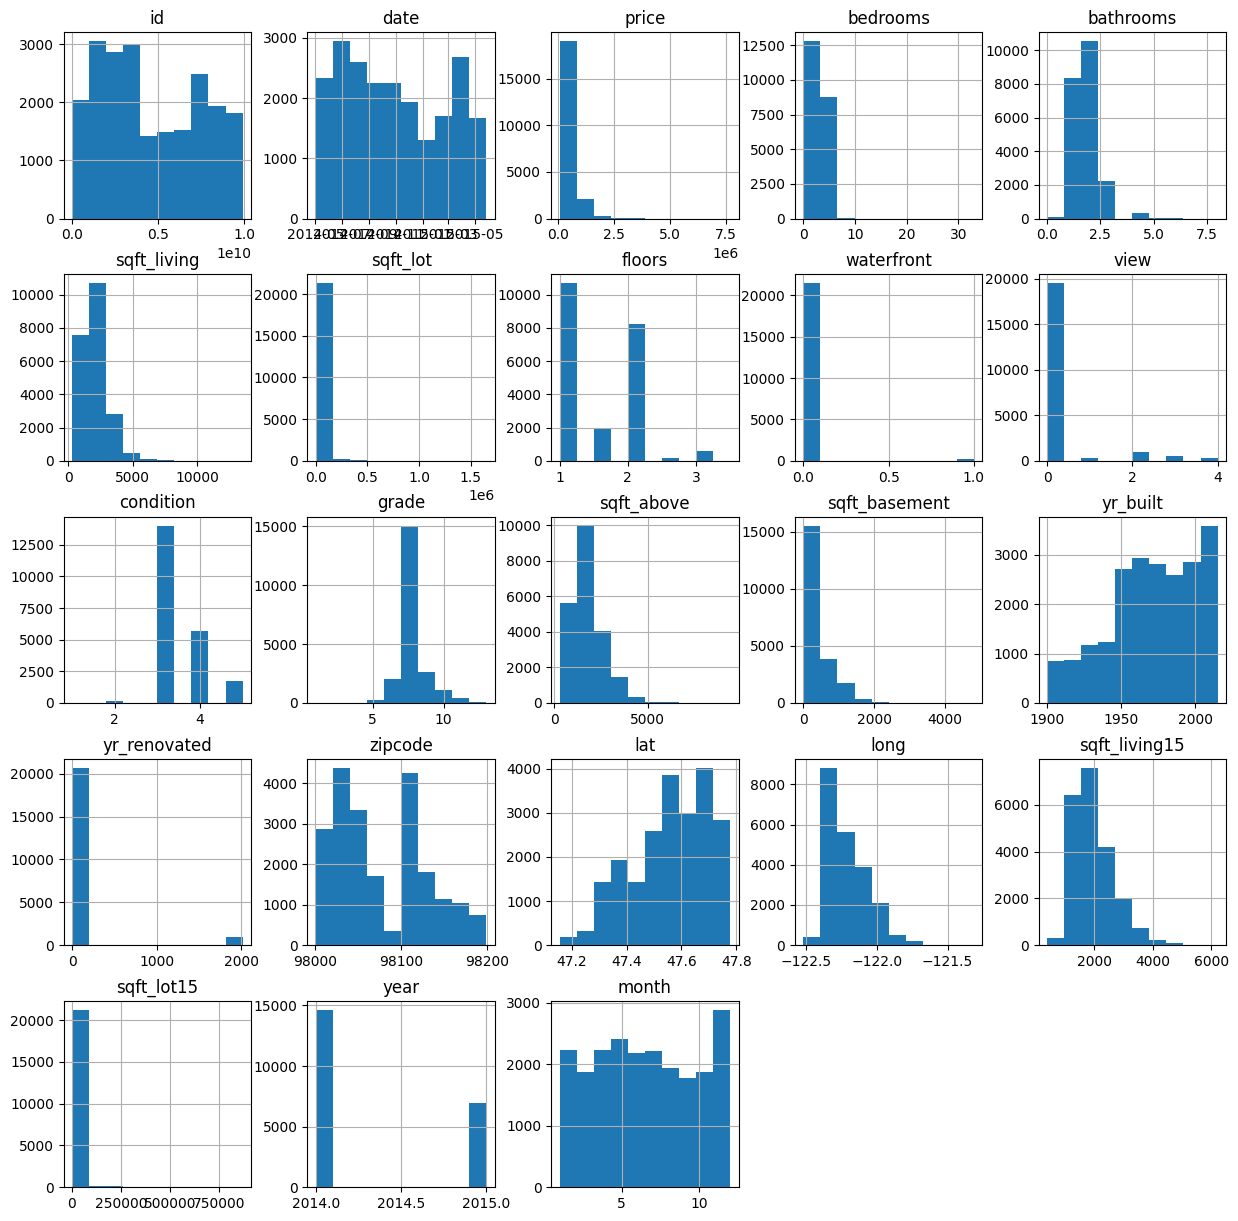

In [71]:
#Plot histograms
df.hist(figsize=(15,15))
plt.show()

The histograms provided give an overview of the distribution of various features in the dataset:

**Price and Size**:
   - Most houses are moderately priced, with the majority under \$1,000,000. 
   - The living space is right-skewed, with most houses having less than 4,000 sqft of living area.
   - Lot sizes are also right-skewed, with most being under 20,000 sqft but some significantly larger.

**Bedrooms and Bathrooms**:
   - The majority of houses have between 2 to 5 bedrooms.
   - Most houses have between 1 to 3 bathrooms, with a few outliers having more.

**Floors and Waterfront**:
   - Most houses have 1 or 2 floors, with fewer having 3 floors or more.
   - Only a small fraction (less than 1%) are waterfront properties.

**View, Condition, and Grade**:
   - Most houses have a view rating of 0, indicating no notable view.
   - The majority of houses are in average to good condition, with a condition rating between 3 and 4.
   - The grade distribution is slightly right-skewed, with most houses having a grade between 7 and 9.

**Construction and Renovation**:
   - There is a wide range of construction years, with a peak in the mid-20th century.
   - Most houses have not been renovated, as indicated by the peak at 0 in the `yr_renovated` histogram.

**Geographical Spread**:
   - Houses are distributed across various zip codes in King County, with some areas having higher concentrations of houses.
   - The latitude and longitude values show the geographical spread of the properties within King County.

**Time of Sale**:
   - Sales are spread across the years 2014 and 2015.
   - Sales are distributed throughout the months of the year, with no significant monthly trends.

### Key Insights

- **Price and Size**: Most houses are moderately priced with smaller living spaces, while a few expensive houses with larger living spaces exist as outliers.
- **Bedrooms and Bathrooms**: The majority of houses have a typical number of bedrooms (3-4) and bathrooms (2-3).
- **Floors and Waterfront**: Most houses are single or two-story buildings, and only a small fraction are waterfront properties.
- **Condition and Grade**: Houses are generally in good condition with above-average grades.
- **Construction and Renovation**: Most houses were built in the mid-1900s, and few have been renovated recently.
- **Geographical Spread**: Houses are distributed across different zip codes in King County, with varying latitude and longitude coordinates.


<Axes: xlabel='grade', ylabel='price'>

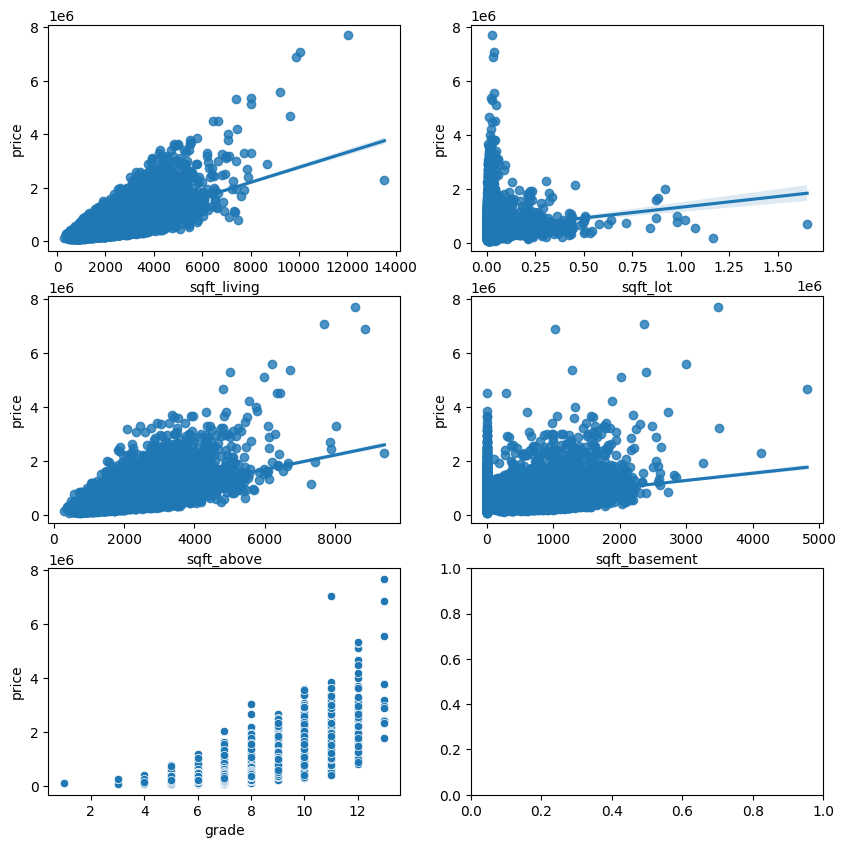

In [72]:
# Regplots
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
sns.regplot(x='sqft_living', y='price', data=df, ax=axes[0, 0])
sns.regplot(x='sqft_lot', y='price', data=df, ax=axes[0, 1])
sns.regplot(x='sqft_above', y='price', data=df, ax=axes[1, 0])
sns.regplot(x='sqft_basement', y='price', data=df, ax=axes[1, 1])
sns.scatterplot(x='grade', y='price', data=df, ax=axes[2, 0])



### Scatter Plot Analysis

**Price vs. Sqft Living**:
   - There is a positive correlation between `price` and `sqft_living`.
   - As the living area increases, the price tends to increase.
   - The relationship shows a linear trend with some outliers at larger living areas.

**Price vs. Sqft Lot**:
   - There is a weak positive correlation between `price` and `sqft_lot`.
   - Most houses have smaller lot sizes, but some higher-priced houses have significantly larger lots.
   - The relationship is not as strong as with `sqft_living`.

**Price vs. Sqft Above**:
   - There is a positive correlation between `price` and `sqft_above`.
   - Houses with larger above-ground square footage tend to have higher prices.
   - Similar to `sqft_living`, this relationship shows a linear trend with some outliers.

**Price vs. Sqft Basement**:
   - There is a positive correlation between `price` and `sqft_basement`.
   - Houses with larger basement areas tend to have higher prices.
   - However, the correlation is weaker compared to `sqft_living` and `sqft_above`.

**Price vs. Grade**:
   - There is a strong positive correlation between `price` and `grade`.
   - Higher grades are associated with significantly higher prices.
   - The relationship is almost linear with distinct steps for each grade level.

<Axes: xlabel='month', ylabel='price'>

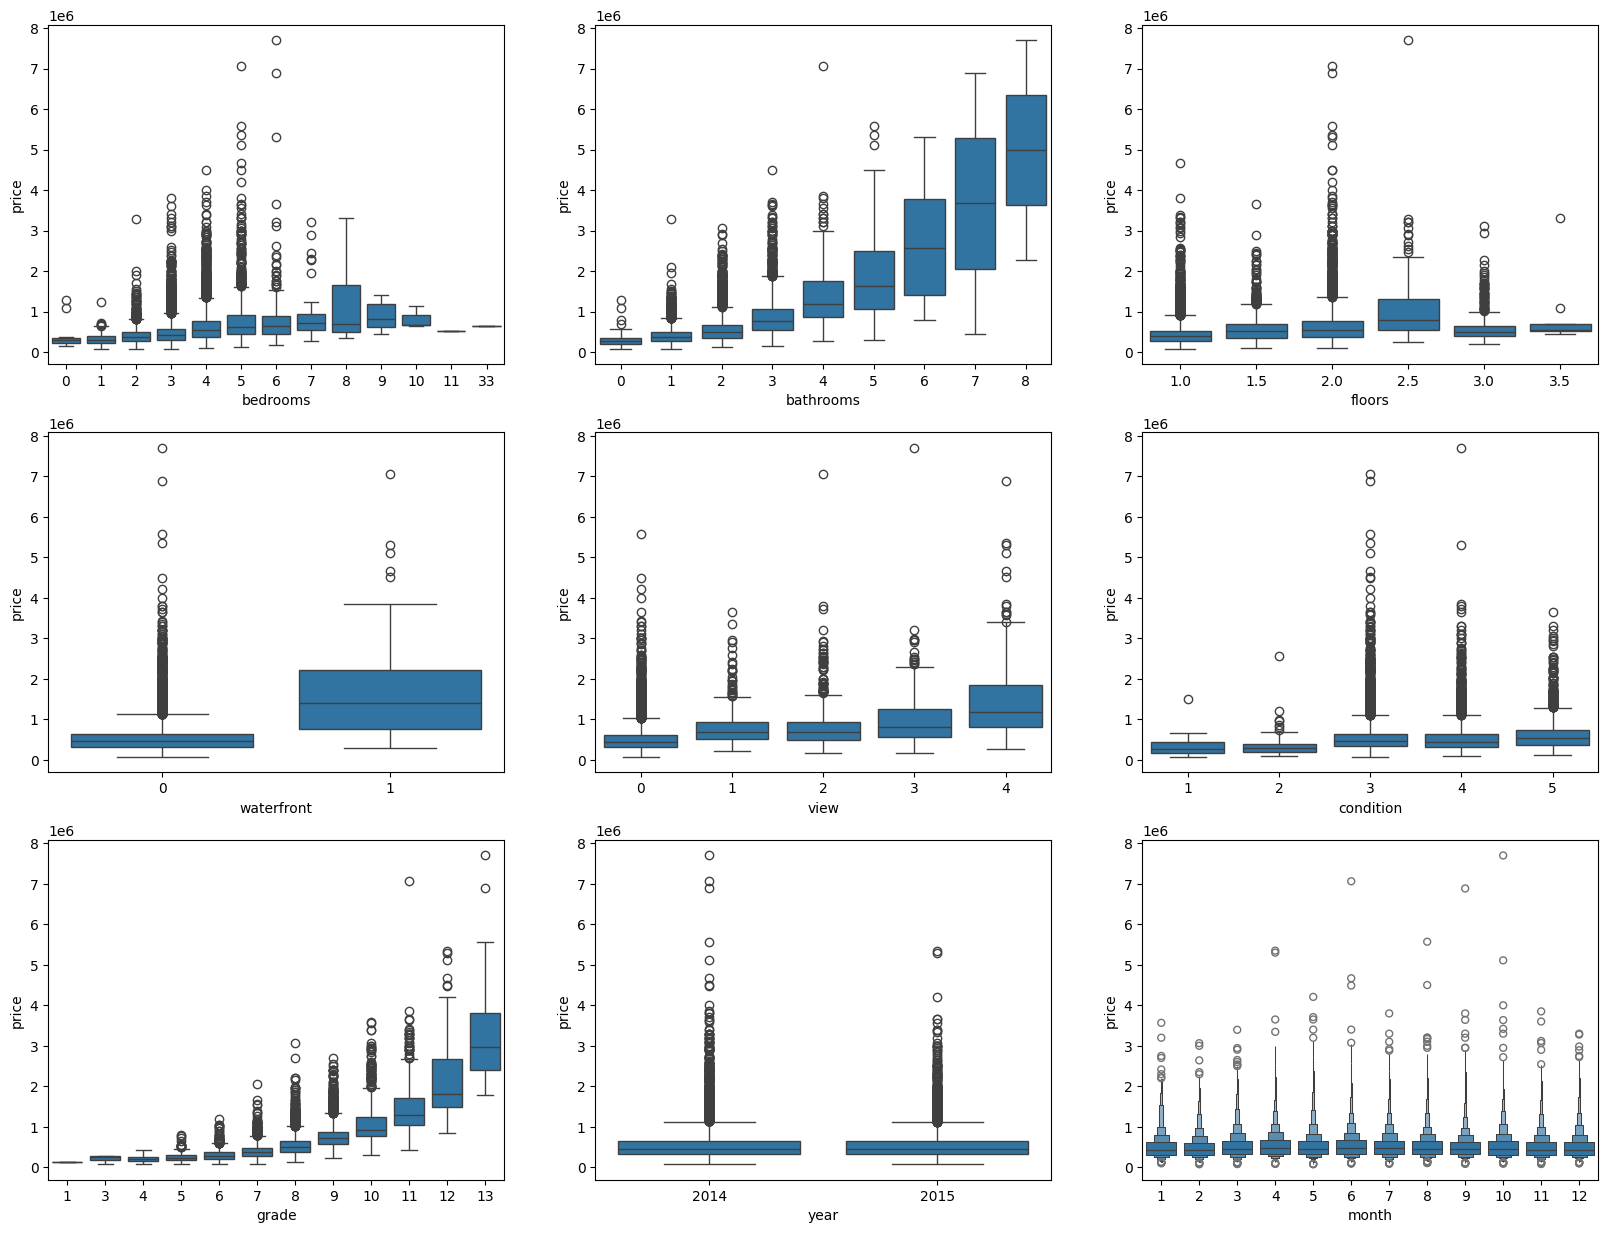

In [73]:
#Boxplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))   
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[0, 0])
sns.boxplot(x='bathrooms', y='price', data=df, ax=axes[0, 1])
sns.boxplot(x='floors', y='price', data=df, ax=axes[0, 2])
sns.boxplot(x='waterfront', y='price', data=df, ax=axes[1, 0])
sns.boxplot(x='view', y='price', data=df, ax=axes[1, 1])
sns.boxplot(x='condition', y='price', data=df, ax=axes[1, 2])
sns.boxplot(x='grade', y='price', data=df, ax=axes[2, 0])
sns.boxplot(x='year', y='price', data=df, ax=axes[2, 1])
sns.boxenplot(x='month', y='price', data=df, ax=axes[2, 2])

**Price vs. Bedrooms**
- The median price increases with the number of bedrooms up to 7, but the relationship is not linear.
- Houses with 8 or more bedrooms have higher price variability and a few extreme outliers.
- There are notable outliers in each category, especially for houses with more bedrooms.

**Price vs. Bathrooms**
- There is a clearer positive correlation between the number of bathrooms and the price.
- Houses with more bathrooms tend to have higher median prices.
- The variability in prices increases with the number of bathrooms, with more outliers in higher categories.

**Price vs. Floors**
- The median price tends to be higher for houses with more floors.
- Houses with 3 or more floors show higher price variability and more outliers.
- There is a significant price increase for houses with 3.5 floors.

**4. Price vs. Waterfront**
- Waterfront properties have significantly higher median prices compared to non-waterfront properties.
- The price variability is also higher for waterfront properties, with many outliers.

**Price vs. View**
- Houses with better views (higher view ratings) tend to have higher median prices.
- There is a clear positive correlation between view rating and price.
- Higher view ratings also show greater price variability and more outliers.

**Price vs. Condition**
- There is a slight positive correlation between the condition of the house and its price.
- Houses in better condition (higher condition ratings) tend to have higher median prices.
- Price variability and outliers are present in all condition categories, especially for houses in excellent condition.

**Price vs. Grade:**
- There is a strong positive correlation between price and grade.
- Higher grades are associated with significantly higher prices.
- The relationship is almost linear with distinct steps for each grade level.

**Price vs. Year:**
- There is no significant difference in prices between houses sold in 2014 and those sold in 2015.
- Both years show similar median prices and price variability.

**Price vs. Month:**
- House prices show some variability across different months.
- There is no clear trend in prices based on the month of sale, but certain months have higher price variability and outliers.

<Axes: xlabel='yr_built', ylabel='price'>

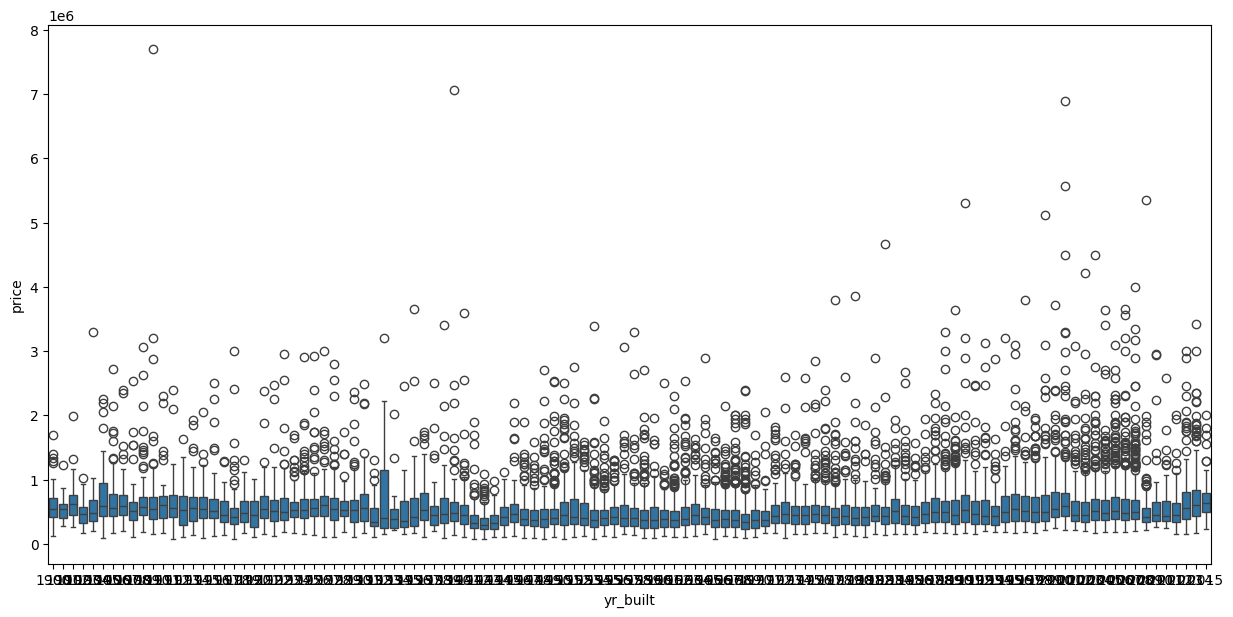

In [74]:
#Boxplot of yr_built
fig, axes = plt.subplots(1, 1, figsize=(15, 7))
sns.boxplot(x='yr_built', y='price', data=df)

There is no positive or negative correlation between 'yr_built' and 'price', only some higher outliers in prices for newer properties. .

In [75]:
#Identify outliers in price column with IQR rule
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
outliers = df[(df['price'] < q1 - 1.5 * iqr) | (df['price'] > q3 + 1.5 * iqr)]
outliers

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
5,7237550310,2014-05-12,1225000.0,4,4,5420,101930,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,5
21,2524049179,2014-08-26,2000000.0,3,2,3050,44867,1.0,0,4,...,720,1968,0,98040,47.5316,-122.233,4110,20336,2014,8
49,822039084,2015-03-11,1350000.0,3,2,2753,65005,1.0,1,2,...,588,1953,0,98070,47.4041,-122.451,2680,72513,2015,3
69,1802000060,2014-06-12,1325000.0,5,2,3200,20158,1.0,0,0,...,1600,1965,0,98004,47.6303,-122.215,3390,20158,2014,6
125,4389200955,2015-03-02,1450000.0,4,2,2750,17789,1.5,0,0,...,770,1914,1992,98004,47.6141,-122.212,3060,11275,2015,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21568,524059330,2015-01-30,1700000.0,4,3,3830,8963,2.0,0,0,...,710,2014,0,98004,47.5990,-122.197,2190,10777,2015,1
21576,9253900271,2015-01-07,3567000.0,5,4,4850,10584,2.0,1,4,...,1310,2007,0,98008,47.5943,-122.110,3470,18270,2015,1
21590,7430200100,2014-05-14,1222500.0,4,3,4910,9444,1.5,0,0,...,1800,2007,0,98074,47.6502,-122.066,4560,11063,2014,5
21597,191100405,2015-04-21,1575000.0,4,3,3410,10125,2.0,0,0,...,0,2007,0,98040,47.5653,-122.223,2290,10125,2015,4


In [76]:
#Remove outliers
df = df[~df['id'].isin(outliers['id'])]

Outliers in the `price` column have been identified using the IQR rule. These are values that lie more than three standard deviations away from the mean price. The identified outliers in the `price` column have been removed from the dataset to ensure a more accurate analysis and modeling process.


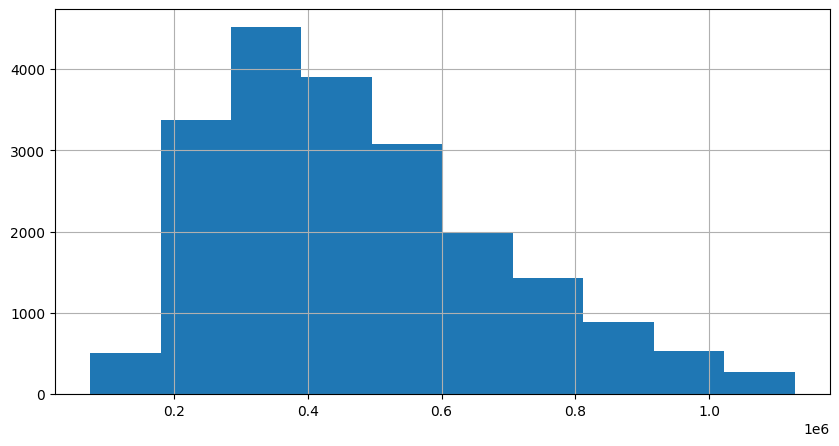

In [77]:
#Price distribution after removing outliers
df['price'].hist(figsize=(10, 5))
plt.show()


The histogram shows the distribution of house prices after removing outliers. The distribution is now more centered and less skewed, providing a clearer view of the typical price range for houses in the dataset. The majority of houses are priced between $200,000 and $600,000.

In [78]:
#Remove row with too many bedrooms, which is probably an error
df = df[df['bedrooms'] < 10]

#Remove unnecessary columns
#Remove date
df = df.drop(['date'], axis=1)
#Remove id
df = df.drop(['id'], axis=1)
#Remove redundant columns
df = df.drop(['sqft_living15', 'sqft_lot15'], axis=1)

#Rename columns that could have trouble with MySQL sintax
df = df.rename(columns={'condition' : 'house_condition', 'lat' : 'latitude', 'long' : 'longitude'})


<Axes: >

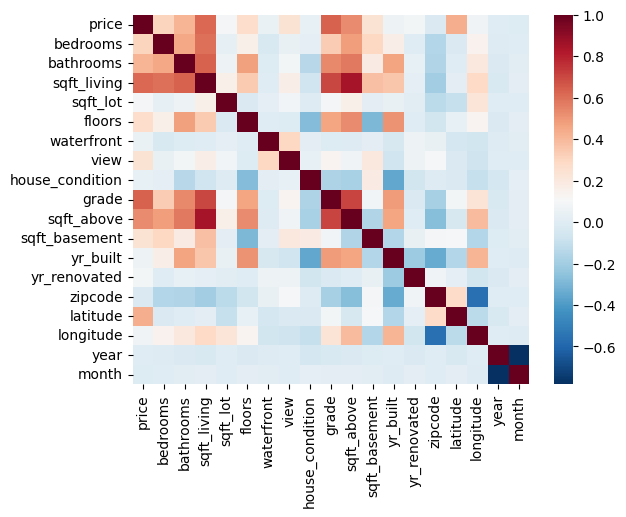

In [79]:
#Correlation matrix with heatmap
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r')

In [80]:
#10 features with high positive correlation with the price
corr['price'].sort_values(ascending=False).head(10)

price            1.000000
grade            0.631340
sqft_living      0.622415
sqft_above       0.530495
latitude         0.430737
bathrooms        0.410718
bedrooms         0.304441
floors           0.274119
view             0.238385
sqft_basement    0.235708
Name: price, dtype: float64

**Strongest Positive Correlation**:
grade and sqft_living are the strongest predictors of house prices. This indicates that the overall quality and size of the living space are the most important factors in determining house value.

**Moderate Positive Correlation**:
Features like sqft_above, and bathrooms also show strong positive correlations with house prices, highlighting the importance of space and amenities.
Latitude shows that location within the region (possibly north-south gradient) has a significant impact on prices.
bedrooms, view, and floors have moderate correlations, indicating that while they do affect prices, their impact is less pronounced compared to living space and quality.

In [81]:
#10 features with high negative correlation with the price
corr['price'].sort_values(ascending=True).head(10)

zipcode           -0.018338
month             -0.013779
year               0.002211
house_condition    0.038201
waterfront         0.051473
yr_built           0.061403
longitude          0.070940
yr_renovated       0.083667
sqft_lot           0.093990
sqft_basement      0.235708
Name: price, dtype: float64

**Negligible to Weak Influence**:
zipcode and month have negligible impacts on house prices. This suggests that variations in location by zip code and the month of sale do not significantly influence house prices.
year of sale also has a negligible impact, indicating stable pricing over the years analyzed.


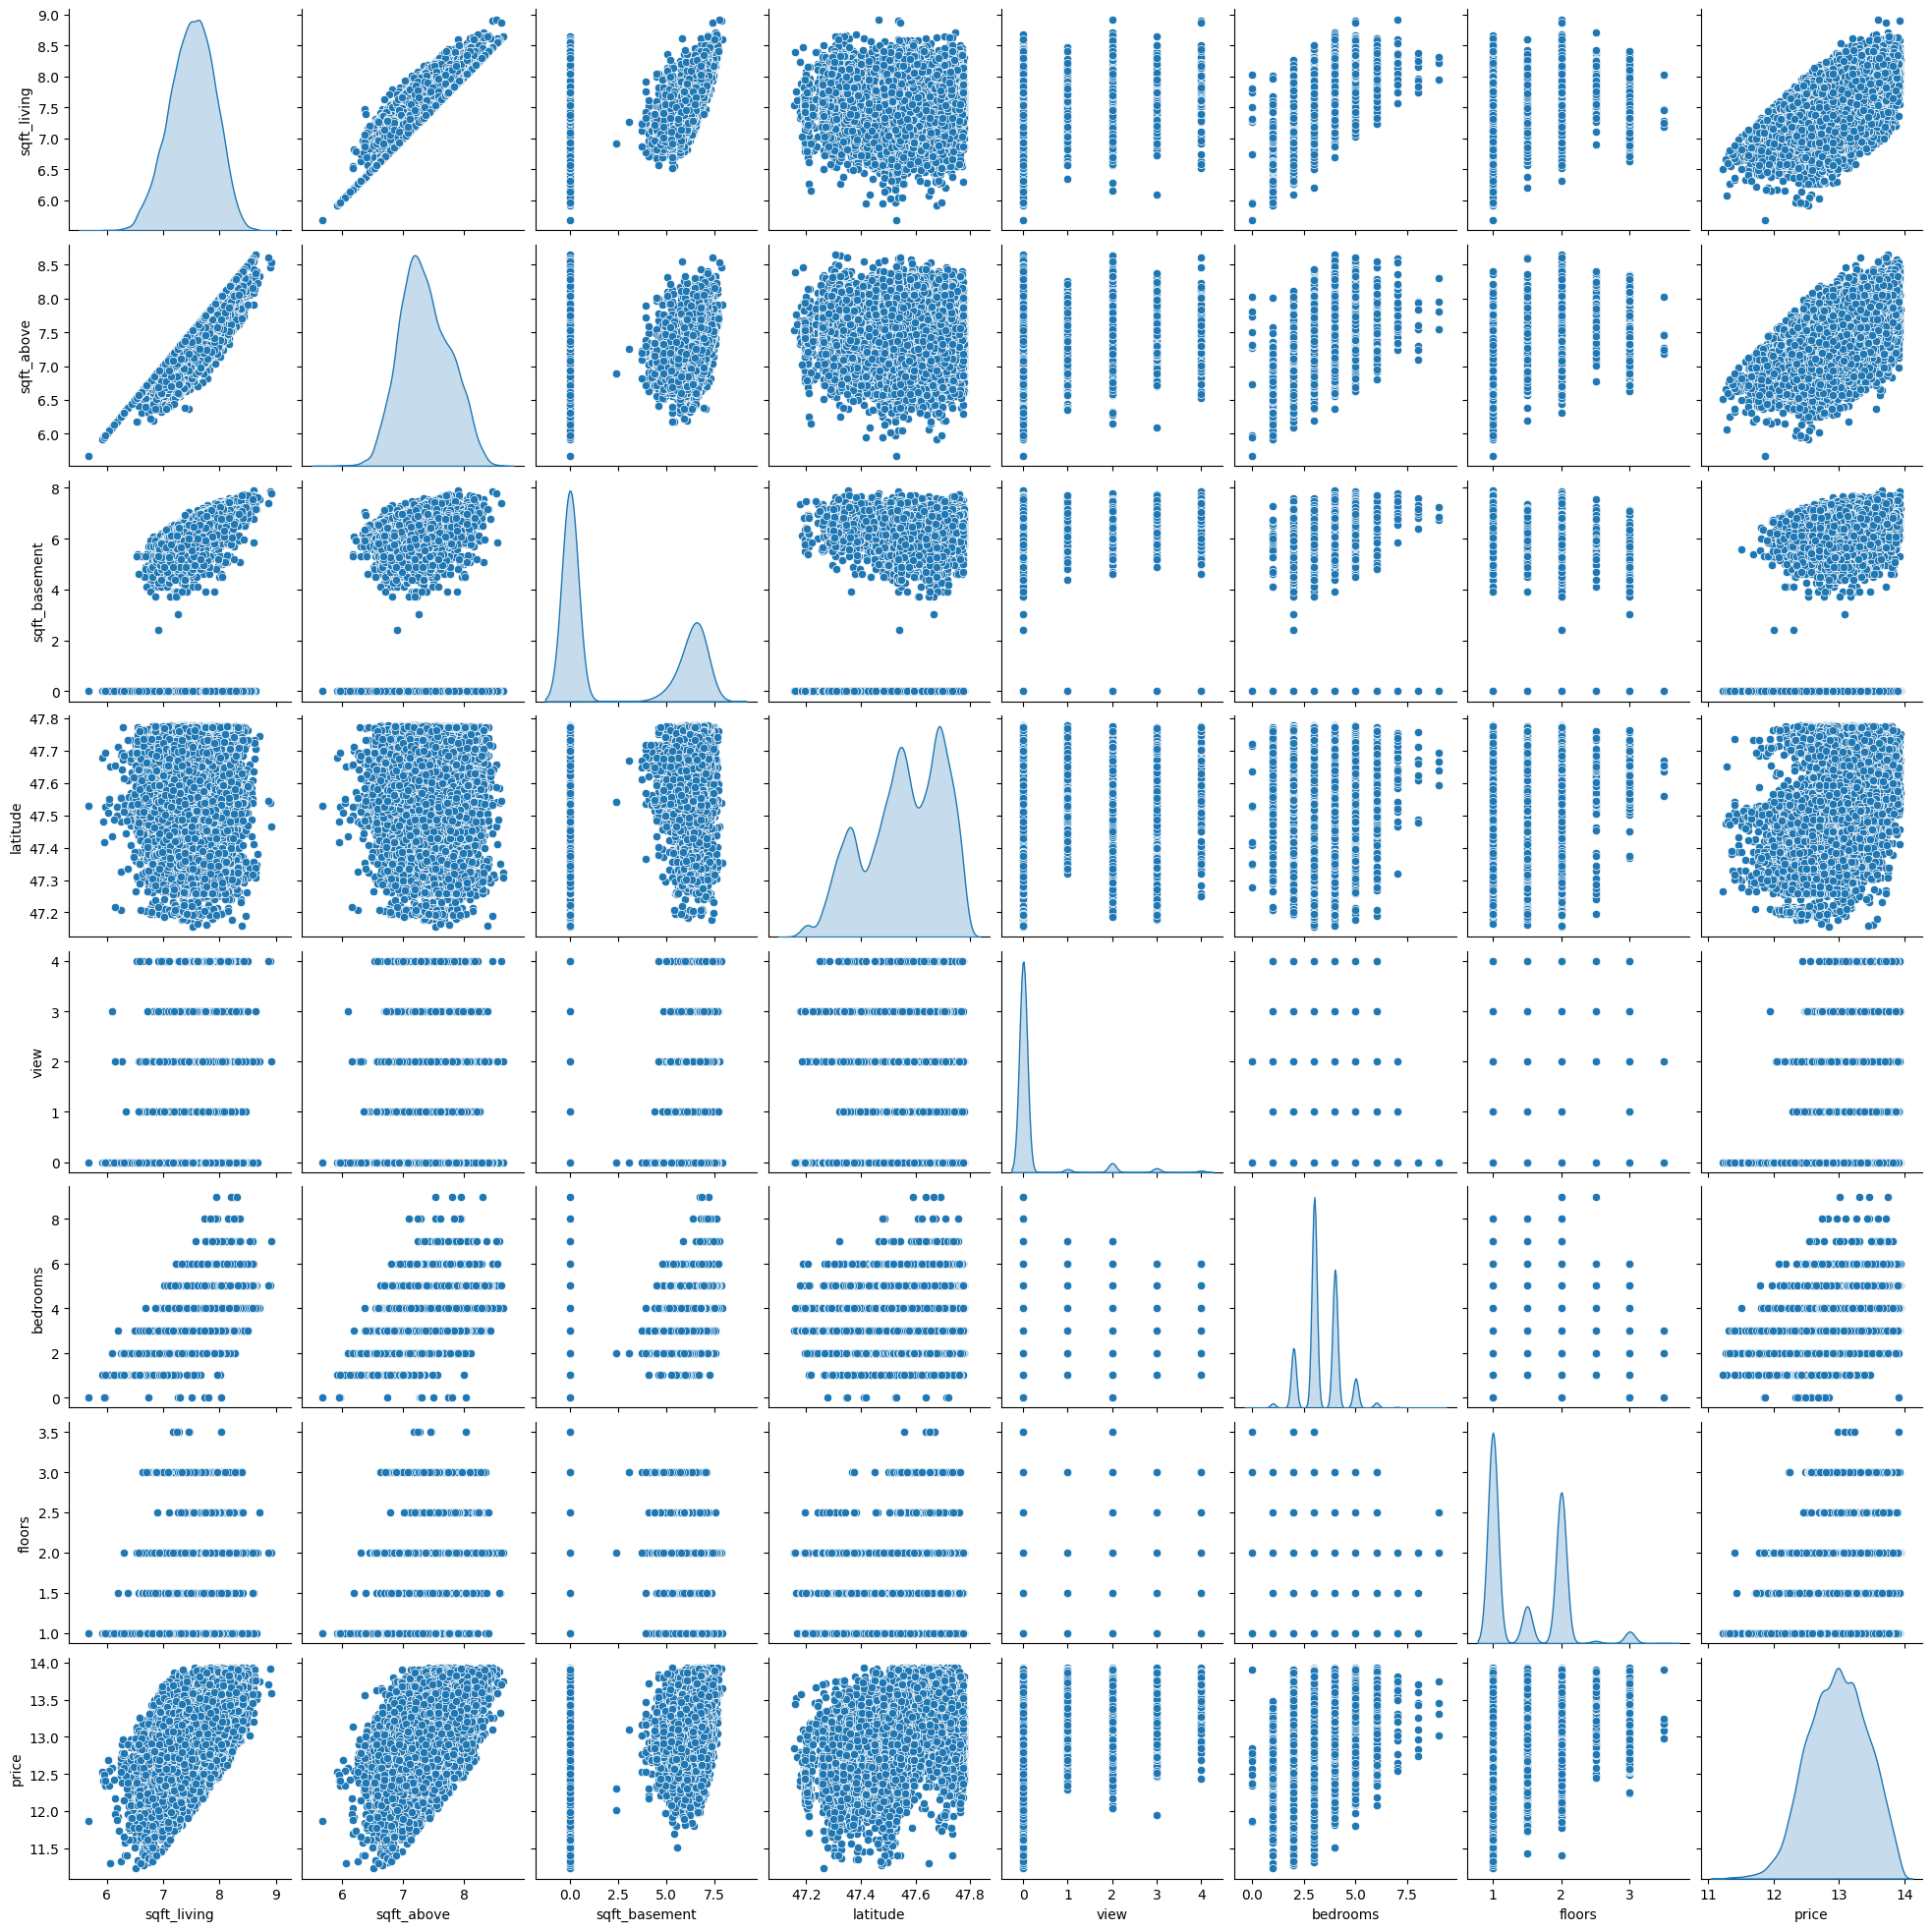

In [82]:
#Apply logarithmic transformation to sqfts features and target and pairplot
df['price'] = np.log1p(df['price'])
df['sqft_living'] = np.log1p(df['sqft_living'])
df['sqft_above'] = np.log1p(df['sqft_above'])
df['sqft_basement'] = np.log1p(df['sqft_basement'])
sns.pairplot(df[['sqft_living', 'sqft_above', 'sqft_basement', 'latitude', 'view', 'bedrooms', 'floors', 'price']], diag_kind='kde')

The log transformation of prices appears to have reduced skewness, creating a more normalized distribution.
The relationships between the transformed price and features like sqft_living, sqft_living15, sqft_above, and bathrooms appear more linear and better spread.

## Modeling

In [83]:
#Separate in training and test sets with fixed seed
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
#Pipeline with StandardScaler, RandomForestRegressor, RandomizedSearchCV and mean_squared_error
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))
])
param_dist = {
    'rf__n_estimators': range(100, 500, 100),
    'rf__max_depth': range(5, 15)
    }

random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, random_state=42)
random_search.fit(X_train, y_train)

print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

Best hyperparameters: {'rf__n_estimators': 400, 'rf__max_depth': 14}
Best score: 0.8574040239800471


The model achieved a cross-validation score of 0.857, indicating strong performance. 

In [85]:
#Train the model with the best hyperparameters
model = random_search.best_estimator_
model.fit(X_train, y_train)

#Evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print('Root mean squared error:', rmse)
print('R2 score:', r2)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MAPE', mean_absolute_percentage_error(y_test, y_pred))

Root mean squared error: 0.1689753852540693
R2 score: 0.8559124163870405
MAE: 0.11936743609158368
MAPE 0.00925056436844934


In [86]:
# Save the model
joblib.dump(model, 'rfr_model.joblib')

['rfr_model.joblib']

In [87]:
df.price.describe()

count    20462.000000
mean        12.979013
std          0.446016
min         11.225257
25%         12.660331
50%         12.988834
75%         13.304687
max         13.935514
Name: price, dtype: float64

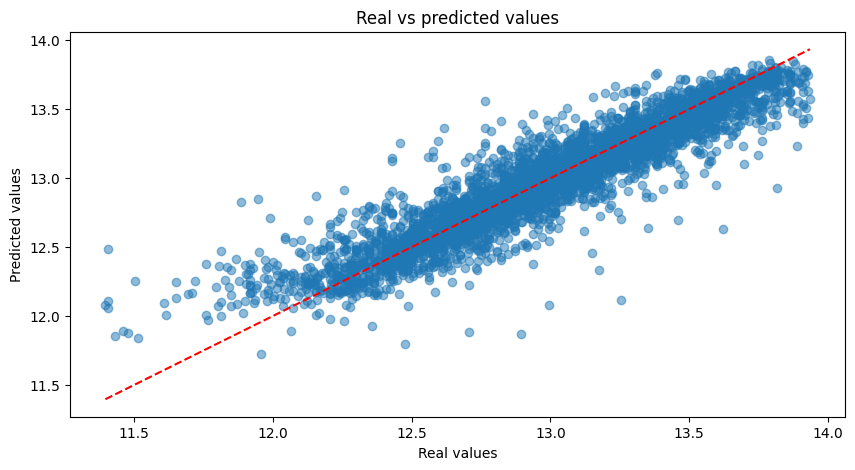

In [88]:
#Plot real vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs predicted values')
plt.show()

- The close clustering of points around the diagonal line indicates good model accuracy.
- The model is reliable for predicting house prices within the given dataset, as evidenced by the strong alignment of predicted and actual values.
- Some problems at higher prices.

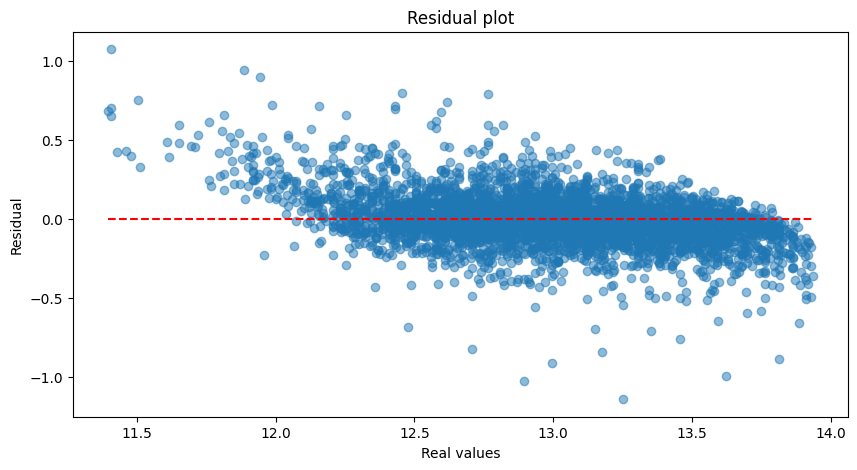

In [89]:
#Residual plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred - y_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [0, 0], 'r--')
plt.xlabel('Real values')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

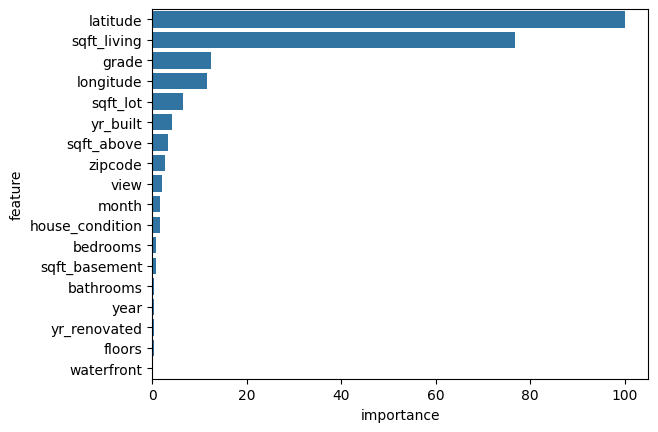

In [90]:
#Get the feature importance
feature_importance = model.named_steps['rf'].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

#Plot the feature importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': feature_importance})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index()
feature_importance = feature_importance.drop('index', axis=1)

sns.barplot(x='importance', y='feature', data=feature_importance)
plt.show()

### Conclusions:
**Key Predictors:**
- grade, lat, and sqft_living are the top three predictors of house prices, indicating that the overall quality, geographic location, and living space are crucial factors.

**Geographic Influence:**
- Latitude (lat) and longitude (long) are significant, highlighting the importance of geographic positioning in the region.

**Living Area:**
- Total living area (sqft_living and sqft_living15) is a critical determinant of house prices, emphasizing the value of space in real estate.

**Other Influences:**
Features like year built, zip code, and view also contribute to house price prediction but to a lesser extent compared to the top predictors.

## Polynomial Features
I'm going yo try PF to see if I can catch more feature relationships.

In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# Pipeline with PolynomialFeatures and RandomForestRegressor
pipeline_poly = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('rf', RandomForestRegressor(random_state=42, n_jobs=-1))
])
param_dist_poly = {
    'rf__n_estimators': range(100, 500, 100),
    'rf__max_depth': range(5, 15)
}

random_search_poly = RandomizedSearchCV(pipeline_poly, param_distributions=param_dist_poly, n_iter=10, random_state=42)
random_search_poly.fit(X_train, y_train)

print('Best hyperparameters:', random_search_poly.best_params_)
print('Best score:', random_search_poly.best_score_)

Best hyperparameters: {'rf__n_estimators': 400, 'rf__max_depth': 14}
Best score: 0.8595122637834083


In [92]:
# Best model
model_poly = random_search_poly.best_estimator_
model_poly.fit(X_train, y_train)

# Evaluate the model
y_pred_poly = model_poly.predict(X_test)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)
print('Root mean squared error:', rmse_poly)
print('R2 score:', r2_poly)
print('MAE:', mean_absolute_error(y_test, y_pred_poly))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_poly))

Root mean squared error: 0.16496669542633863
R2 score: 0.8626678506220478
MAE: 0.11740008197990273
MAPE: 0.009098255795857085


In [93]:
#Save the model
joblib.dump(model_poly, 'rfr_model_poly.joblib')

['rfr_model_poly.joblib']

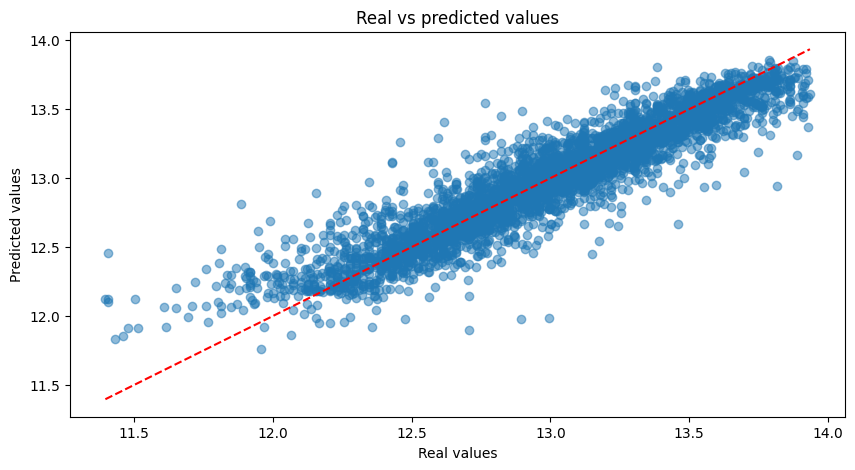

In [94]:
#Plot real vs predicted values
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_poly, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Real vs predicted values')
plt.show()

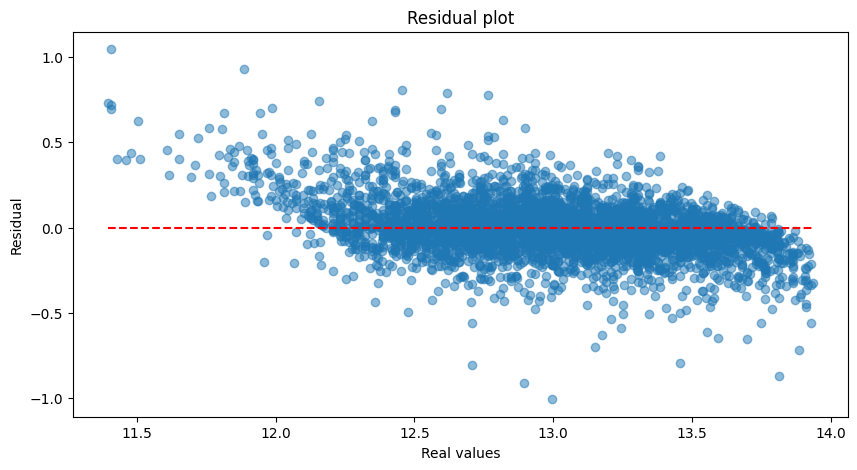

In [95]:
#Residual plot
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_poly - y_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [0, 0], 'r--')
plt.xlabel('Real values')
plt.ylabel('Residual')
plt.title('Residual plot')
plt.show()

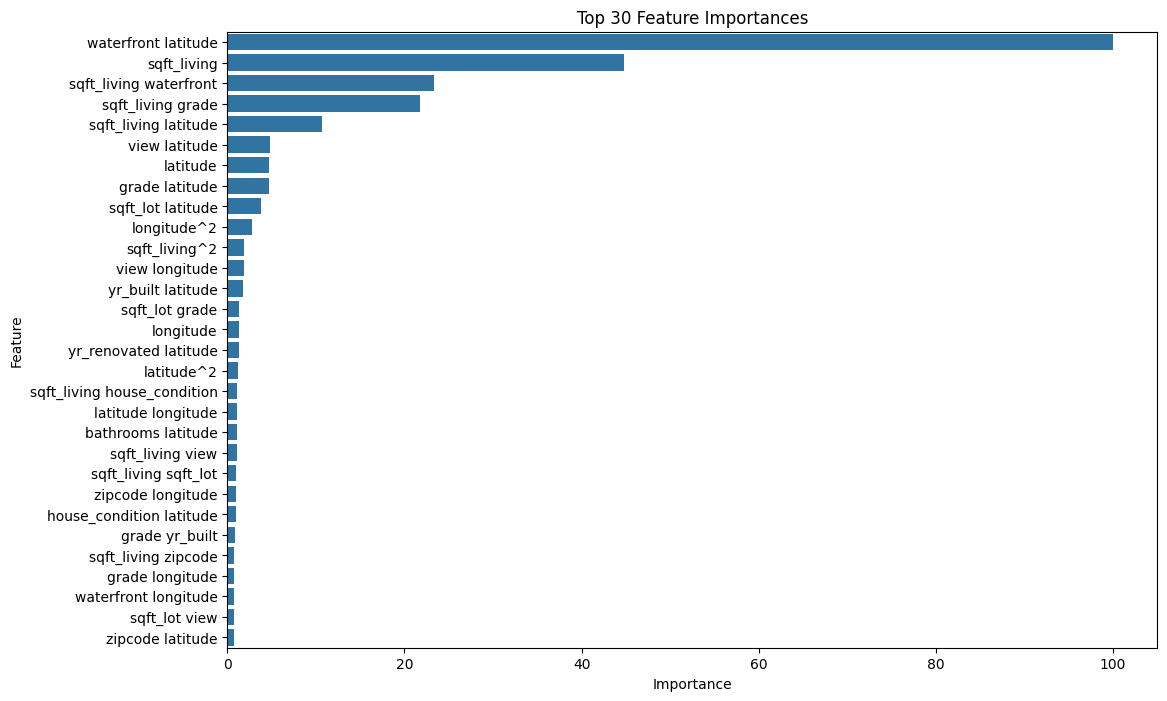

In [96]:
# Get feature names for polynomial features
poly_features = model_poly.named_steps['poly'].get_feature_names_out(X.columns)

# Get feature importance
feature_importance_poly = model_poly.named_steps['rf'].feature_importances_
feature_importance_poly = 100.0 * (feature_importance_poly / feature_importance_poly.max())

# Create DataFrame
feature_importance_df_poly = pd.DataFrame({'feature': poly_features, 'importance': feature_importance_poly})
feature_importance_df_poly = feature_importance_df_poly.sort_values('importance', ascending=False).reset_index(drop=True)

# Limit to top 20 features
top_n = 30
top_features = feature_importance_df_poly.head(top_n)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=top_features)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances')
plt.show()


In [97]:
# Compare models results
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Random Forest with Polynomial Features'],
    'Score': [random_search.best_score_,random_search_poly.best_score_],
    'RMSE': [rmse, rmse_poly],
    'R2 Score': [r2, r2_poly]
})

comparison_df

,Model,Score,RMSE,R2 Score
0,Random Forest,0.857404,0.168975,0.855912
1,Random Forest with Polynomial Features,0.859512,0.164967,0.862668


Although the Random Forest model with polynomial features showed a slight improvement in performance metrics (RMSE and R2 score), the marginal gains may not justify the substantial increase in computational cost.